# Verification of Neural Feature Ansatz and Exploration of Neural Feature Matrix

**Ethan Shapiro**

### Introduction
This notebook shows examples of how to explore the trained models. There are three different functions that will allow you to produce results to confirm NFA as well as explore the similarities between the Neural Feature Matrix (NFM) and Gradient Outer Products (GOP).

In [1]:
from explore_funcs import *

In [2]:
# Specify the pah to the model you want to explore here
MODEL_PATH = 'C:/Repository/dsc-180a-1/saved_nns/feature_29_rosycheeks/celeba_num_epochs_500_learning_rate_0.1_weight_decay_0_init_default_optimizer_sgd_freeze_False_width_1024_depth_5_act_relu_nn.pth'
INIT_PATH = 'C:/Repository/dsc-180a-1/saved_nns/feature_29_rosycheeks/init_celeba_num_epochs_500_learning_rate_0.1_weight_decay_0_init_default_optimizer_sgd_freeze_False_width_1024_depth_5_act_relu_nn.pth'

## Compute Neural Feature Matrix and Gradient Outer Products

To do any of the exploration, we need our Neural Feature Matrix (M) and the Gradeient Outer Product (M)

In [3]:
M, G = calculate_NFM_GOP(MODEL_PATH, 'celeba', layer_idx=0, feature_idx=29)

['C:/Repository/dsc-180a-1/saved', 'nns/feature', '29', 'rosycheeks/celeba', 'num', 'epochs', '500', 'learning', 'rate', '0.1', 'weight', 'decay', '0', 'init', 'default', 'optimizer', 'sgd', 'freeze', 'False', 'width', '1024', 'depth', '5', 'act', 'relu', 'nn.pth']
(1024, 27648)


  0%|          | 2/19962 [00:00<00:59, 333.29it/s]


Train Size:  2027 Val Size:  507 Test Size:  1
Computing Jacobian for batch:  0 3
Computing Jacobian for batch:  1 3
Computing Jacobian for batch:  2 3
torch.Size([2027, 2, 27648])
0 3
1 3
2 3
Computing Jacobian for batch:  0 3
Computing Jacobian for batch:  1 3
Computing Jacobian for batch:  2 3
torch.Size([2027, 2, 27648])
0 3
1 3
2 3
Calulated Neural Feature Matrix and Gradient Outer Product for layer: 0


### 1. Verify that the Neural Feature Ansatz (NFA) Holds

To verify NFA, we want to see a low correlation with the first layer and a high correlation between the NFM and the GOP

In [4]:
init, centered, uncentered = get_NFA_correlation(path=MODEL_PATH, init_path=INIT_PATH, layer_idx=0, feature_idx=29)

['C:/Repository/dsc-180a-1/saved', 'nns/feature', '29', 'rosycheeks/celeba', 'num', 'epochs', '500', 'learning', 'rate', '0.1', 'weight', 'decay', '0', 'init', 'default', 'optimizer', 'sgd', 'freeze', 'False', 'width', '1024', 'depth', '5', 'act', 'relu', 'nn.pth']
(1024, 27648)
(1024, 27648)
Init Net Feature Matrix Correlation:  0.14903169783833686


  0%|          | 2/19962 [00:00<00:49, 399.80it/s]


Train Size:  2027 Val Size:  507 Test Size:  1
Computing Jacobian for batch:  0 3
Computing Jacobian for batch:  1 3
Computing Jacobian for batch:  2 3
torch.Size([2027, 2, 27648])
0 3
1 3
2 3
Computing Jacobian for batch:  0 3
Computing Jacobian for batch:  1 3
Computing Jacobian for batch:  2 3
torch.Size([2027, 2, 27648])
0 3
1 3
2 3
Full Matrix Correlation Centered:  0.9719459087342438
Full Matrix Correlation Uncentered:  0.970067470336489


### 2. Look at how the NFM and GOP compare as well as their threshholded pixel values

Ideally, we want the NFM to be almost indistinguishable from the GOP. This function also plots a thresholded image, making the top 98% of pixels black and layering the RGB layers instead of combining them. This allows us to see which RGB values contribute the most to which areas of our features.

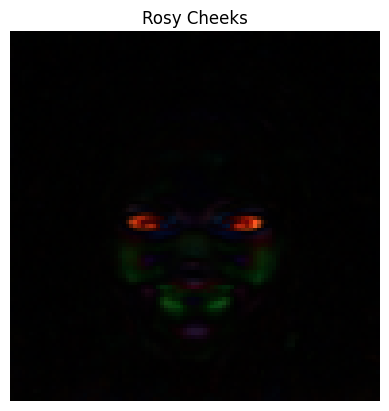

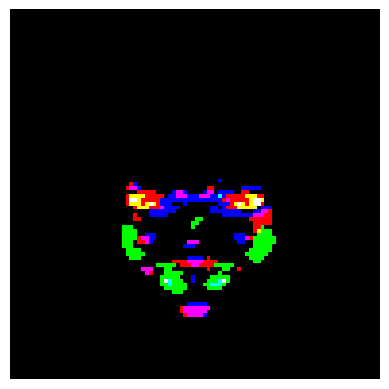

In [5]:
plot_NFM_GOP(M, feature_name='Rosy Cheeks', dataset='celeba', save=True)

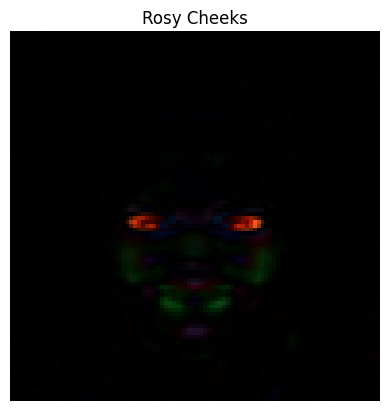

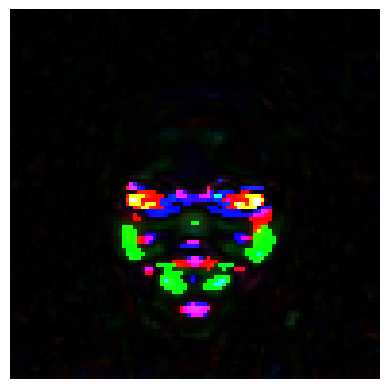

In [6]:
plot_NFM_GOP(G, feature_name='Rosy Cheeks', dataset='celebA', save=False)

### 3. Compare the top Eigenvector of NFM and GOP

By looking at the top eigenvector of the NFM and GOP, we can see how all features are related to each other. We expect the NFM and GOP to be extremely similar.

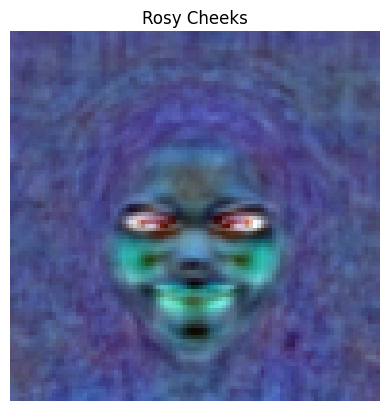

In [7]:
plot_top_eigenvector(M, 'Rosy Cheeks', dataset='celeba', save=True)

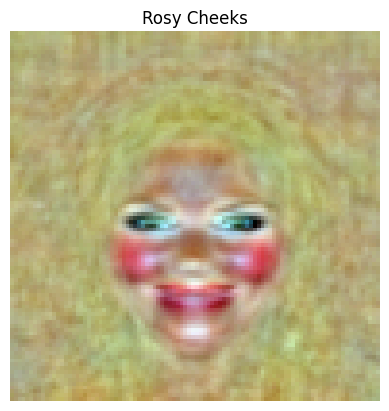

: 

In [8]:
plot_top_eigenvector(G.cpu().numpy(), 'Rosy Cheeks', dataset='celeba', save=True)